In [1]:
import pandas as pd
from scipy.stats import entropy

def calculate_1st_moments(df, window_size):    
    
    '''
    function:
    ---------
    calculate moving/rolling statistics (ie moments). 
    
    a list of moments can be found here: http://pandas.pydata.org/pandas-docs/version/0.15.2/computation.html
    
    each time unit is 20ms (eg 50hz). each event is typically 1s, which means a window should be at least 50 units wide.
    

    
    parameters:
    -----------
    @df: raw, unmodified dataframe of 9-dimensional sensor data.
    @window_size: int, refers to window of rolling window.
    
    returns:
    --------
    @df: modified df with moments features.
    '''
    
    df['time_body_accX_mean'] = pd.rolling_mean(df['accX'], window_size)
    df['time_body_accY_mean'] = pd.rolling_mean(df['accY'], window_size)
    df['time_body_accZ_mean'] = pd.rolling_mean(df['accZ'], window_size)
    
    df['time_body_accX_std'] = pd.rolling_std(df['accX'], window_size)
    df['time_body_accY_std'] = pd.rolling_std(df['accY'], window_size)
    df['time_body_accZ_std'] = pd.rolling_std(df['accZ'], window_size)
    
    df['time_gravity_accX_mean'] = pd.rolling_mean(df['gravX'], window_size)
    df['time_gravity_accY_mean'] = pd.rolling_mean(df['gravY'], window_size)
    df['time_gravity_accZ_mean'] = pd.rolling_mean(df['gravZ'], window_size)
    
    df['time_gravity_accX_std'] = pd.rolling_std(df['gravX'], window_size)
    df['time_gravity_accY_std'] = pd.rolling_std(df['gravY'], window_size)
    df['time_gravity_accZ_std'] = pd.rolling_std(df['gravZ'], window_size)
    
    # statistics for body jerk
    df['body_accX_jerk'] = pd.rolling_apply(df['accX'], window_size, lambda x: x[(window_size - 1)] - x[0])
    df['body_accY_jerk'] = pd.rolling_apply(df['accY'], window_size, lambda x: x[(window_size - 1)] - x[0])
    df['body_accZ_jerk'] = pd.rolling_apply(df['accZ'], window_size, lambda x: x[(window_size - 1)] - x[0])
    
    df['time_body_accX_jerk_mean'] = pd.rolling_mean(df['body_accX_jerk'], window_size)
    df['time_body_accY_jerk_mean'] = pd.rolling_mean(df['body_accY_jerk'], window_size)
    df['time_body_accZ_jerk_mean'] = pd.rolling_mean(df['body_accZ_jerk'], window_size)
    
    df['time_body_accX_jerk_std'] = pd.rolling_std(df['body_accX_jerk'], window_size)
    df['time_body_accY_jerk_std'] = pd.rolling_std(df['body_accY_jerk'], window_size)
    df['time_body_accZ_jerk_std'] = pd.rolling_std(df['body_accZ_jerk'], window_size)
    
    # this one still uses rolling window
    df['magnitude'] = ((df['time_body_accX_mean']**2) + (df['time_body_accY_mean']**2) + (df['time_body_accZ_mean'] ** 2)) ** .5
    
    # this magnitude calculation does not use rolling window
    df['body_magnitude'] = ((df['accX']**2) + (df['accY']**2) + (df['accZ'] ** 2)) ** .5
    df['time_body_magnitude_mean'] = pd.rolling_mean(df['body_magnitude'], window_size)
    df['time_body_magnitude_std'] = pd.rolling_std(df['body_magnitude'], window_size)
    
    
    # [33] "time.gravity.accelerometer.magnitude.mean" [m/s^2]
    df['gravity_magnitude'] = ((df['gravX']**2) + (df['gravY']**2) + (df['gravZ'] ** 2)) ** .5
    df['time_grav_magnitude_mean'] = pd.rolling_mean(df['gravity_magnitude'], window_size)
    
    # [34] "time.gravity.accelerometer.magnitude.std" [m/s^2]
    df['time_grav_magnitude_std'] = np.log(pd.rolling_std(df['gravity_magnitude'], window_size))
    
    # [35] "time.body.accelerometer.jerk.magnitude.mean" [m/s^3]
    df['body_magnitude_jerk'] = pd.rolling_apply(df['body_magnitude'], window_size, lambda x: x[(window_size - 1)] - x[0])
    df['time_body_magnitude_jerk_mean'] = pd.rolling_mean(df['body_magnitude_jerk'], window_size)
    
    # [36] "time.body.accelerometer.jerk.magnitude.std" [m/s^3]
    df['time_body_magnitude_jerk_std'] = pd.rolling_std(df['body_magnitude_jerk'], window_size)
    
    # [41] "frequency.body.accelerometer.mean.X" [(m/s^2)^2]
    df['frequency_body_accX_mean'] = np.log(pd.rolling_apply(df['accX'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [42] "frequency.body.accelerometer.mean.Y" [(m/s^2)^2]
    df['frequency_body_accY_mean'] = np.log(pd.rolling_apply(df['accY'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [43] "frequency.body.accelerometer.mean.Z" [(m/s^2)^2]
    df['frequency_body_accZ_mean'] = np.log(pd.rolling_apply(df['accZ'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [44] "frequency.body.accelerometer.std.X" [(m/s^2)^2]
    df['frequency_body_accX_std'] = np.log(pd.rolling_apply(df['accX'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    # [45] "frequency.body.accelerometer.std.Y" [(m/s^2)^2]
    df['frequency_body_accY_std'] = np.log(pd.rolling_apply(df['accY'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    # [46] "frequency.body.accelerometer.std.Z" [(m/s^2)^2]
    df['frequency_body_accZ_std'] = np.log(pd.rolling_apply(df['accZ'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    
    
    # [50] "frequency.body.accelerometer.jerk.mean.X" [(m/s^3)^2]
    df['frequency_body_accX_jerk_mean'] = np.log(pd.rolling_apply(df['body_accX_jerk'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [51] "frequency.body.accelerometer.jerk.mean.Y" [(m/s^3)^2]
    df['frequency_body_accY_jerk_mean'] = np.log(pd.rolling_apply(df['body_accY_jerk'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [52] "frequency.body.accelerometer.jerk.mean.Z" [(m/s^3)^2]
    df['frequency_body_accZ_jerk_mean'] = np.log(pd.rolling_apply(df['body_accZ_jerk'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [53] "frequency.body.accelerometer.jerk.std.X" [(m/s^3)^2] 
    df['frequency_body_accX_jerk_std'] = np.log(pd.rolling_apply(df['body_accX_jerk'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    # [54] "frequency.body.accelerometer.jerk.std.Y" [(m/s^3)^2]
    df['frequency_body_accY_jerk_std'] = np.log(pd.rolling_apply(df['body_accY_jerk'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    # [55] "frequency.body.accelerometer.jerk.std.Z" [(m/s^3)^2]
    df['frequency_body_accZ_jerk_std'] = np.log(pd.rolling_apply(df['body_accZ_jerk'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    
    # [68] "frequency.body.accelerometer.magnitude.mean" [(m/s^2)^2]
    df['frequency_body_magnitude_mean'] = np.log(pd.rolling_apply(df['body_magnitude'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [69] "frequency.body.accelerometer.magnitude.std" [(m/s^2)^2]
    df['frequency_body_magnitude_std'] = np.log(pd.rolling_apply(df['body_magnitude'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    # [71] "frequency.body.body.accelerometer.jerk.magnitude.mean" [(m/s^3)^2]    
    df['frequency_body_magnitude_jerk_mean'] = np.log(pd.rolling_apply(df['body_magnitude_jerk'], 8, lambda x: np.mean(np.fft.fft(x) - np.mean(x))))
    
    # [72] "frequency.body.body.accelerometer.jerk.magnitude.std" [(m/s^3)^2]
    df['frequency_body_magnitude_jerk_std'] = np.log(pd.rolling_apply(df['body_magnitude_jerk'], 8, lambda x: np.std(np.fft.fft(x) - np.mean(x))))
    
    df['time_body_accX_median'] = pd.rolling_median(df['accX'], window_size)
    df['time_body_accY_median'] = pd.rolling_median(df['accY'], window_size)
    df['time_body_accZ_median'] = pd.rolling_median(df['accZ'], window_size)
    
    df['time_body_accX_min'] = pd.rolling_min(df['accX'], window_size)
    df['time_body_accY_min'] = pd.rolling_min(df['accY'], window_size)
    df['time_body_accZ_min'] = pd.rolling_min(df['accZ'], window_size)
    
    df['time_body_accX_max'] = pd.rolling_max(df['accX'], window_size)
    df['time_body_accY_max'] = pd.rolling_max(df['accY'], window_size)
    df['time_body_accZ_max'] = pd.rolling_max(df['accZ'], window_size)
    
    
    df['time_body_accX_var'] = pd.rolling_var(df['accX'], window_size)
    df['time_body_accY_var'] = pd.rolling_var(df['accY'], window_size)
    df['time_body_accZ_var'] = pd.rolling_var(df['accZ'], window_size)
    
    df['time_body_accX_skew'] = pd.rolling_skew(df['accX'], window_size)
    df['time_body_accY_skew'] = pd.rolling_skew(df['accY'], window_size)
    df['time_body_accZ_skew'] = pd.rolling_skew(df['accZ'], window_size)
    
    df['time_body_accX_kurt'] = pd.rolling_kurt(df['accX'], window_size)
    df['time_body_accY_kurt'] = pd.rolling_kurt(df['accY'], window_size)
    df['time_body_accZ_kurt'] = pd.rolling_kurt(df['accZ'], window_size)
    
    df['time_body_accXY_corr'] = pd.rolling_corr(df['accX'], df['accY'], window_size)
    df['time_body_accXZ_corr'] = pd.rolling_corr(df['accX'], df['accZ'], window_size)
    df['time_body_accYZ_corr'] = pd.rolling_corr(df['accY'], df['accZ'], window_size)
    
    
    df['time_body_pitch'] = np.arctan(df['accX'] / ((df['accY'] ** 2) + (df['accZ'] ** 2)))
    df['time_body_roll'] = np.arctan(df['accY'] / ((df['accX'] ** 2) + (df['accZ'] ** 2)))
    
    df['pitch_delta'] = pd.rolling_apply(df['time_body_pitch'], window_size, lambda x: x[window_size - 1] - x[0])
    df['roll_delta'] = pd.rolling_apply(df['time_body_roll'], window_size, lambda x: x[window_size - 1] - x[0])
    
    df['min_accX_jerk'] = pd.rolling_min(df['body_accX_jerk'], window_size)
    df['min_accY_jerk'] = pd.rolling_min(df['body_accY_jerk'], window_size)
    df['min_accZ_jerk'] = pd.rolling_min(df['body_accZ_jerk'], window_size)
    
    df['max_accX_jerk'] = pd.rolling_max(df['body_accX_jerk'], window_size)
    df['max_accY_jerk'] = pd.rolling_max(df['body_accY_jerk'], window_size)
    df['max_accZ_jerk'] = pd.rolling_max(df['body_accZ_jerk'], window_size)
    
    df['jerkXY_corr'] = pd.rolling_corr(df['body_accX_jerk'], df['body_accY_jerk'], window_size)
    df['jerkXZ_corr'] = pd.rolling_corr(df['body_accX_jerk'], df['body_accZ_jerk'], window_size)
    df['jerkYZ_corr'] = pd.rolling_corr(df['body_accY_jerk'], df['body_accZ_jerk'], window_size)
        
    df['minmaxX'] = df['time_body_accX_max'] - df['time_body_accX_min'] 
    df['minmaxY'] = df['time_body_accY_max'] - df['time_body_accY_min'] 
    df['minmaxZ'] = df['time_body_accZ_max'] - df['time_body_accZ_min'] 
    
    df['minmaxX_jerk'] = df['max_accX_jerk'] - df['min_accX_jerk'] 
    df['minmaxY_jerk'] = df['max_accY_jerk'] - df['min_accY_jerk'] 
    df['minmaxZ_jerk'] = df['max_accZ_jerk'] - df['min_accZ_jerk'] 
    
    df['zero_crossings'] = pd.rolling_apply(df['body_magnitude'], 10, lambda x: len(np.where(np.diff(np.sign(x)))[0]))
    df['magnitude_change'] = pd.rolling_apply(df['magnitude'], window_size, lambda x: x[window_size - 1] - x[0])
    df['magnitude_jerk'] = ((df['body_accX_jerk']**2) + (df['body_accY_jerk']**2) + (df['body_accZ_jerk'] ** 2)) ** .5
    
    # energy can be calculated in either time or frequency space - in time domain, it is sum(x^2)
    df['magnitude_energy'] = pd.rolling_apply(df['magnitude'], window_size, lambda x: np.sum(x ** 2))
    df['body_magnitude_energy'] = pd.rolling_apply(df['body_magnitude'], window_size, lambda x: np.sum(x ** 2))
    df['gravity_magnitude_energy'] = pd.rolling_apply(df['gravity_magnitude'], window_size, lambda x: np.sum(x ** 2))
    df['body_magnitude_jerk_energy'] = pd.rolling_apply(df['body_magnitude_jerk'], window_size, lambda x: np.sum(x ** 2))
    
    # entropy is usually calculated in frequency space https://www.idiap.ch/workshop/interhub2011/papers/Muhammad/
    df['magnitude_entropy'] = pd.rolling_apply(df['magnitude'], window_size, lambda x: entropy(x))
    df['body_magnitude_entropy'] = pd.rolling_apply(df['body_magnitude'], window_size, lambda x: entropy(x))
    df['gravity_magnitude_entropy'] = pd.rolling_apply(df['gravity_magnitude'], window_size, lambda x: entropy(x))
        
    return df

In [2]:
from scipy import signal
import numpy as np

def identify_peaks(df, wavelet_window, rolling_window):
    '''
    function:
    ---------
    given df with magnitude, find peaks through wavelets. peaks are used as landmarks. 
    
    parameters:
    -----------
    @wavelet_window: int, referring to width of window for wavelet calculation. a value of 250 seems to work well.
    @rolling_window: int, referring to width of window for rolling mean calculation. this is needed to shift peaks 
    to its corresponding position, since the row index does not reset.
    
    returns:
    --------
    @ls_peaks_shifted: list, referring to list of indices where peaks were found through wavelets.
    '''
    
    ls_peaks = signal.find_peaks_cwt(df['body_magnitude'], np.arange(1,wavelet_window))
    
    ls_peaks_shifted = peakind = map(lambda x: x + rolling_window, ls_peaks)
    
    return ls_peaks_shifted

In [3]:
def expand_peaks(ls_peaks, left_padding, right_padding):
    
    '''
    function:
    ---------
    given a list of peaks, add padding to left and right of the peak. expanding the peak effectively widens the
    criteria for a gesture.
    
    parameters:
    -----------
    @ls_peaks: list, representing peaks as identified by identify_peaks()
    @left_padding: int, representing distance right of the peak. each unit represents 20ms. .
    @right_padding: int. right_padding must be greater than left_padding
    
    returns:
    --------
    @ls_expanded_peaks: list, representing peaks with padding
    '''
    ls_expanded_peaks = []
    
    for peak in ls_peaks:
    
        for num in range(peak + left_padding, peak + right_padding + 1):
            ls_expanded_peaks.append(num)
            
    return ls_expanded_peaks

In [4]:
def categorize(df, ls_peaks_expanded, gesture):
    '''
    function:
    ---------
    classify peaks to dataframe. datapoints with row index numbers in ls_peaks will be classified as a gesture.
    
    parameters:
    -----------
    @df: dataframe, returned by calculate_magnitude()
    @ls_peaks_expanded: list, representing list of expanded peaks - with padding - as generated by expand_peaks()
    
    returns:
    --------
    @df: modified dataframe
    
    '''
    df['label'] = map(lambda x: gesture if x in ls_peaks_expanded else "none", df.index)
    
    
    return df

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

def display(ls_parsed_df, index):
    '''
    helper function to visualize expanded peaks.
    '''
    
    sample = ls_parsed_df[index]
    df = sample[0]
    ls_expanded_peaks = sample[1]

    plt.figure(1)

    plt.subplot(211)
    plt.plot(df['magnitude'])

    for peak in ls_expanded_peaks:
        plt.axvline(peak, color='red')
        
    plt.subplot(212)
    plt.plot(df['magnitude'])
    
    plt.show()

# pipeline

In [6]:
def _grab_files(directory):

    ls_files = glob.glob('raw_data/' + directory + "/*")
    ls_files = filter(lambda x: (x.split(".")[-1] == 'dat') | (x.split(".")[-1] == 'txt'), ls_files)
    
    return ls_files

In [7]:
import glob
import time

def process_data(directory, window_size, left_border, right_border):
    
    '''
    function:
    ---------
    driver function that processes raw data through the pipeline.
    
    parameters:
    -----------
    @directory: str, representing folder containing 9 dimensional data.
    @window_size: int, used to calculate moments in time series data. 50 seems to work well.
    @left_border: number of units after peak to be classified as gesture event.
    @right_border: number of units after peak to be classified as gesture event.
    
    returns:
    --------
    @ls_parsed_df: list of dataframes, each dataframe is the processed dataframe.
    
    '''
    
    start = time.time()

    ls_files = _grab_files(directory)

    print "number of files in directory: ", len(ls_files)
    print '------------------------------------------------'

    ls_parsed_df = [] # list of processed data dat files
    
    for i, path in enumerate(ls_files):

        gesture_type = pd.read_csv(path, header = None).ix[0,0]

        print 'iteration: ', i, '/', len(ls_files)
        print 'file name: ', path
        print 'gesture type: ', gesture_type

        df_1 = pd.read_csv(path, delimiter='|', skiprows=1,)

        df_2 = calculate_1st_moments(df_1, window_size)

        ls_peaks = identify_peaks(df_2, 250, window_size)
        
        ls_peaks = filter(lambda x: x > 50, ls_peaks) # filter out pre-collection jitter
        
        print 'peaks detected: ', len(ls_peaks)
        
        ls_new_peaks = map(lambda x: np.argmax(df_2.ix[(x - 30): (x + 30),'magnitude']), ls_peaks)
        
        ls_expanded_peaks = expand_peaks(ls_new_peaks, left_border, right_border)

        df_3 = categorize(df_2, ls_expanded_peaks, gesture_type)
        
        df_3['corresponding_file'] = path

        newfilepath = "annotated_" + directory + "_" + gesture_type + "_" + str(left_border) + "_" + str(right_border) + "_" + path.split('/')[2]

        df_3.to_csv(newfilepath)

        ls_parsed_df.append((df_3, ls_expanded_peaks))

        print '------------------------------------------------'

    print 'job completed! execution time: ', time.time() - start
    
    return ls_parsed_df

In [8]:
# ls_directories = ['20160122', '20160125', '20160126', '20160127', '20160201', '20160203']

# ls_directories = ['oob']
ls_directories = ['staging']

for d in ls_directories:
    
    ls_data = process_data(d, 4, -5, 5)


number of files in directory:  9
------------------------------------------------
iteration:  0 / 9
file name:  raw_data/staging/ios_raw_horizontal_snaps_data.1454968426.461871.txt
gesture type:  Snap
peaks detected:  10
------------------------------------------------
iteration:  1 / 9
file name:  raw_data/staging/ios_raw_horizontal_snaps_data.1454968497.923133.txt
gesture type:  Snap
peaks detected:  10
------------------------------------------------
iteration:  2 / 9
file name:  raw_data/staging/ios_raw_horizontal_snaps_data.1454968571.674393.txt
gesture type:  Snap
peaks detected:  10
------------------------------------------------
iteration:  3 / 9
file name:  raw_data/staging/ios_raw_horizontal_snaps_data.1454968648.975889.txt
gesture type:  Snap
peaks detected:  10
------------------------------------------------
iteration:  4 / 9
file name:  raw_data/staging/ios_raw_horizontal_snaps_data.1454968700.721570.txt
gesture type:  Snap
peaks detected:  10
---------------------------

/Users/Vincent/anaconda/lib/python2.7/site-packages/pandas/stats/moments.py:755: ComplexWarning: Casting complex values to real discards the imaginary part
  return algos.roll_generic(arg, window, minp, offset, func, args, kwargs)


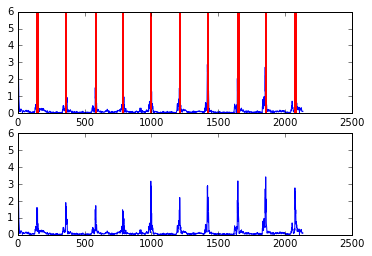

In [9]:
display(ls_data, 1)

In [10]:
df_1 = pd.read_csv('raw_data/staging/ios_raw_horizontal_flick_data.1453492001.985598.txt', delimiter='|', skiprows=1)

df_2 = calculate_1st_moments(df_1, 4)

ls_peaks = identify_peaks(df_2, 250, 4)

ls_peaks = filter(lambda x: x > 50, ls_peaks)

ls_new_peaks = map(lambda x: np.argmax(df_2.ix[(x - 30): (x + 30),'magnitude']), ls_peaks)

for p in ls_new_peaks:
    print p

IOError: File raw_data/staging/ios_raw_horizontal_flick_data.1453492001.985598.txt does not exist

In [ ]:
plt.plot(df_2['magnitude'])
plt.axvline(994, color='red')

In [ ]:
plt.plot(df_2.ix[0:150,'magnitude'])
plt.axvline(144, color='red')